# Расходимость на равномерной сетке

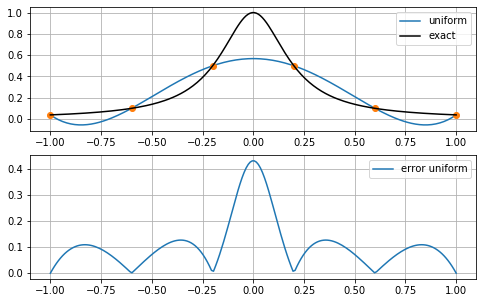

In [1]:
%matplotlib inline
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt


f = lambda x: 1/(25*x**2 + 1)
x = np.linspace(-1, 1, 200)
n = 6 # 5,20
# uniform
xi = np.linspace(-1, 1, n)
yi = f(xi)
Ln = BarycentricInterpolator(xi,yi)
y = Ln(x)


#
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8,5) )
ax1.plot(x, y, label = 'uniform')
ax1.plot(xi, yi,'o')
ax1.plot(x, f(x),'k-', label = 'exact')
ax1.legend()
ax1.grid(True)

ax2.plot(x, np.abs(f(x) - y), label = 'error uniform')
ax2.legend()
ax2.grid(True)

# Сходимость для аналитической функции
Для аналитических функций ошибки интерполяции на Чебышёвских узлах убывает как $O(\rho^{-n})$

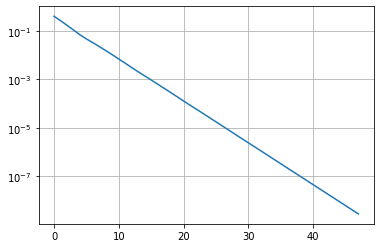

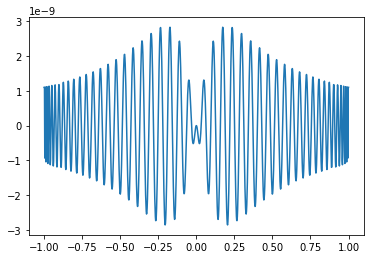

In [2]:
%matplotlib inline
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt
#
f = lambda x: 1/(25*x**2 + 1)
xx = np.linspace(-1, 1, 1000)
error = []
for n in range(5, 101, 2):
    j = np.arange(n)
    xi = np.cos(np.pi/(2*n) + np.pi * j / n)
    yi = f(xi)
    Ln = BarycentricInterpolator(xi,yi)
    error.append(np.max(np.abs(Ln(xx) - f(xx))))

# plt.plot(xx, f(x),'k-')
plt.semilogy(error)
plt.grid(True)
plt.show()
plt.plot(xx, f(xx) - Ln(xx))

# Сходимость для модуля
$|x|$ - непрерывная функция, но её производная - разрывная. Ошибка убывает как $O(1/n)$

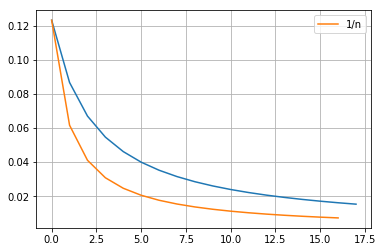

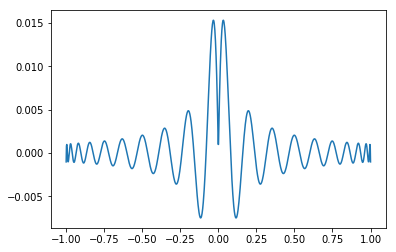

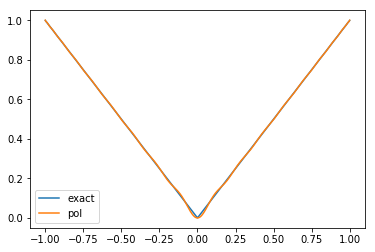

In [25]:
%matplotlib inline
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt
#
f = lambda x: np.abs(x)
xx = np.linspace(-1, 1, 1000)
error = []
for n in range(5, 41, 2):
    j = np.arange(n)
    xi = np.cos(np.pi/(2*n) + np.pi * j / n)
    yi = f(xi)
    Ln = BarycentricInterpolator(xi,yi)
    error.append(np.max(np.abs(Ln(xx) - f(xx))))

# plt.plot(xx, f(x),'k-')
plt.plot(error)
plt.plot(error[0]/np.arange(1,len(error)), 
         label = '1/n')
plt.legend()
plt.grid(True)
plt.show()
plt.plot(xx, f(xx) - Ln(xx))
plt.show()
plt.plot(xx, f(xx), label = 'exact')
plt.plot(xx, Ln(xx), label = 'pol')
plt.legend()

# Сходимость сплайна для аналитической функции

Из-за насыщаемости, сплайн "не чувстствует" дополнительной гладкости, ошибка убывает как $O(n^{-4})$

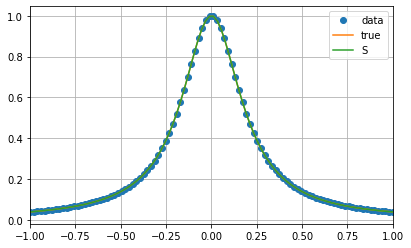

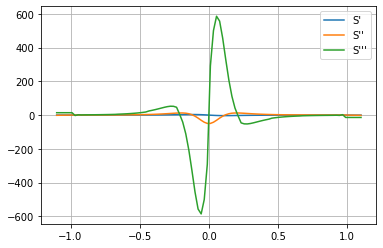

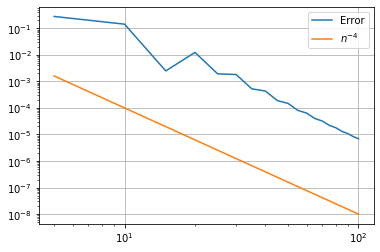

In [8]:
from scipy.interpolate import CubicSpline
f = lambda x: 1 / (25*x**2 + 1)
n = 10
error = []
xx = np.linspace(-1, 1, 1000)
n_arr  = []
for n in range(5, 101, 5):
    x = np.linspace(-1, 1, n)
    y = f(x)
    cs = CubicSpline(x, y, bc_type = 'natural')
    xs = np.linspace(-1.1,1.1,100)
    n_arr.append(n)
    error.append(np.max(np.abs(f(xx) - cs(xx))))
error = np.array(error)
n_arr = np.array(n_arr)

plt.figure(figsize=(6.5, 4))
plt.plot(x, y, 'o', label='data')
plt.plot(xs, f(xs), label='true')
plt.plot(xs, cs(xs), label="S")
plt.xlim(-1, 1)
plt.legend()
plt.grid(True)
plt.show()

plt.plot(xs, cs(xs, 1), label="S'")
plt.plot(xs, cs(xs, 2), label="S''")
plt.plot(xs, cs(xs, 3), label="S'''")
plt.legend()
plt.grid(True)
plt.show()

plt.loglog(n_arr, error, label = 'Error')
plt.plot(n_arr, n_arr**(-4.), label = '$n^{-4}$')
plt.legend()
plt.grid(True)

# Свойство квазилокальности
При изменении значения в одном узле, изменения в сплайне убывают при удалении от этого узла.

In [57]:
n = 5
a = np.zeros((5,5))
a = np.diag(4 * np.ones(n), 0) + \
np.diag(np.ones(n-1), -1) + np.diag(np.ones(n-1),1)

print(a)
print(np.linalg.inv(a))

[[4. 1. 0. 0. 0.]
 [1. 4. 1. 0. 0.]
 [0. 1. 4. 1. 0.]
 [0. 0. 1. 4. 1.]
 [0. 0. 0. 1. 4.]]
[[ 0.26794872 -0.07179487  0.01923077 -0.00512821  0.00128205]
 [-0.07179487  0.28717949 -0.07692308  0.02051282 -0.00512821]
 [ 0.01923077 -0.07692308  0.28846154 -0.07692308  0.01923077]
 [-0.00512821  0.02051282 -0.07692308  0.28717949 -0.07179487]
 [ 0.00128205 -0.00512821  0.01923077 -0.07179487  0.26794872]]
